In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
# from tensorflow.python.keras._impl import keras
from keras.layers import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.layers import Input
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
import keras.layers 
from keras.layers import Flatten
from keras.optimizers import SGD
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import pickle

%matplotlib inline

Using TensorFlow backend.


In [3]:
#Import data
X = pd.read_pickle('train_max_x')
y = pd.read_csv('train_max_y.csv')
y = y['Label']

X = X.astype('float32')/255
X = np.repeat(X.reshape(X.shape[0], 128, 128, 1), 1, axis=1)
#X = tf.image.grayscale_to_rgb(X)
y = to_categorical(y, 10)

In [ ]:
def show_image(image, idx, highest_num):
    plt.figure(figsize=(6,5))
    plt.imshow(image, label="", cmap='gray', vmin=0, vmax=1)
    # plt.gca().text(5, 5, F'idx: {idx}, num: {highest_num}',  
    #                bbox={'facecolor': 'white', 'pad': 10})
    plt.title(F'idx: {idx}, num: {highest_num}')
    plt.colorbar()

In [4]:
from random import randint
def bg_rm_rand(img):
  img[img<1-(randint(20, 70)/255)] = 0
  return img

def bg_rm(img):
  img[img<1-50/255] = 0
  return img

In [5]:
#checkpoints
#checkpoint = ModelCheckpoint("./models/{epoch:02d}E5x5x8-{loss:.2f}.h5", verbose=1, save_best_only=False,
                            # save_weights_only=False, mode='auto', period=1)
#callbacks_list = [checkpoint]

#Train
batch_size = 256
aug = ImageDataGenerator(rotation_range=180,
                        #  width_shift_range=int(20),
                        #  height_shift_range=int(20),
                        #  zoom_range=0.2,
                         preprocessing_function=bg_rm,
                          validation_split=0.01
                         )
training_data = aug.flow(X, y, batch_size=batch_size, subset='training')
validation_data = aug.flow(X, y, batch_size=batch_size, subset='validation')

In [7]:
#Original model
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(128,128,1)))
model.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#Actual model
model2 = keras.Sequential()
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(128,128,1)))
model2.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu')) 
model2.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu')) 
model2.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(230, kernel_size=(3,3), activation='relu')) 
model2.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [10]:
model3 = keras.Sequential()
model3.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(128,128,1)))
model3.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model3.add(MaxPooling2D(pool_size=(4, 4)))

model3.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model3.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model3.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(230, kernel_size=(3,3), activation='relu')) 
model3.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [4]:
#final home-made CNN model
modelfinal = keras.Sequential()
modelfinal.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(128,128,1)))
modelfinal.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
modelfinal.add(MaxPooling2D(pool_size=(4, 4)))

modelfinal.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
modelfinal.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
modelfinal.add(MaxPooling2D(pool_size=(2, 2)))

modelfinal.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
modelfinal.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
modelfinal.add(MaxPooling2D(pool_size=(2, 2)))

modelfinal.add(Conv2D(230, kernel_size=(3,3), activation='relu')) 
modelfinal.add(keras.layers.Dropout(0.01, noise_shape=None, seed=None))
modelfinal.add(MaxPooling2D(pool_size=(2, 2)))
modelfinal.add(Flatten())

modelfinal.add(Dense(10, activation='softmax'))
modelfinal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history2 = model1.fit_generator(training_data, 
                              epochs=30, verbose=1,
                              validation_data=validation_data
                              )
with open('./InceptionV3_fitgen_history2.pickle', 'wb') as f:
     pickle.dump(history2.history, f)

Epoch 1/30
167/167 [==============================] - 62s 372ms/step - loss: 1.8972 - accuracy: 0.2578 - val_loss: 1.8334 - val_accuracy: 0.2756
Epoch 2/30
167/167 [==============================] - 57s 342ms/step - loss: 1.8011 - accuracy: 0.3111 - val_loss: 1.6362 - val_accuracy: 0.3504
Epoch 3/30
167/167 [==============================] - 57s 342ms/step - loss: 1.6789 - accuracy: 0.3766 - val_loss: 1.6061 - val_accuracy: 0.4285
Epoch 4/30
167/167 [==============================] - 57s 341ms/step - loss: 1.5460 - accuracy: 0.4441 - val_loss: 1.5999 - val_accuracy: 0.4699
Epoch 5/30
167/167 [==============================] - 57s 343ms/step - loss: 1.4182 - accuracy: 0.4805 - val_loss: 1.3834 - val_accuracy: 0.5180
Epoch 6/30
167/167 [==============================] - 57s 341ms/step - loss: 1.3254 - accuracy: 0.5182 - val_loss: 1.4038 - val_accuracy: 0.5488
Epoch 7/30
167/167 [==============================] - 57s 342ms/step - loss: 1.2073 - accuracy: 0.5649 - val_loss: 1.3198 - val_ac

In [12]:
history1 = model.fit_generator(training_data, 
                              epochs=400, verbose=1,
                              validation_data=validation_data
                              )

# history = model.fit(X[0:40000], y[0:40000],
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(X[40001:], y[40001:]))

Epoch 1/400
167/167 [==============================] - 64s 383ms/step - loss: 1.8966 - categorical_accuracy: 0.2617 - val_loss: 1.9569 - val_categorical_accuracy: 0.2725
Epoch 2/400
167/167 [==============================] - 58s 346ms/step - loss: 1.8640 - categorical_accuracy: 0.2742 - val_loss: 1.6934 - val_categorical_accuracy: 0.3256
Epoch 3/400
167/167 [==============================] - 58s 350ms/step - loss: 1.7587 - categorical_accuracy: 0.3402 - val_loss: 1.7047 - val_categorical_accuracy: 0.3527
Epoch 4/400
167/167 [==============================] - 58s 347ms/step - loss: 1.6522 - categorical_accuracy: 0.3967 - val_loss: 1.6077 - val_categorical_accuracy: 0.4296
Epoch 5/400
167/167 [==============================] - 58s 349ms/step - loss: 1.5693 - categorical_accuracy: 0.4416 - val_loss: 1.5661 - val_categorical_accuracy: 0.4503
Epoch 6/400
167/167 [==============================] - 58s 349ms/step - loss: 1.4699 - categorical_accuracy: 0.4675 - val_loss: 1.3865 - val_categoric

Epoch 49/400
167/167 [==============================] - 58s 349ms/step - loss: 0.7136 - categorical_accuracy: 0.7634 - val_loss: 0.7666 - val_categorical_accuracy: 0.7605
Epoch 50/400
167/167 [==============================] - 58s 347ms/step - loss: 0.7227 - categorical_accuracy: 0.7628 - val_loss: 0.8433 - val_categorical_accuracy: 0.7608
Epoch 51/400
167/167 [==============================] - 58s 348ms/step - loss: 0.7100 - categorical_accuracy: 0.7653 - val_loss: 0.7833 - val_categorical_accuracy: 0.7540
Epoch 52/400
167/167 [==============================] - 58s 348ms/step - loss: 0.7268 - categorical_accuracy: 0.7630 - val_loss: 0.5237 - val_categorical_accuracy: 0.7393
Epoch 53/400
167/167 [==============================] - 58s 348ms/step - loss: 0.7198 - categorical_accuracy: 0.7626 - val_loss: 0.8549 - val_categorical_accuracy: 0.7621
Epoch 54/400
167/167 [==============================] - 58s 349ms/step - loss: 0.7182 - categorical_accuracy: 0.7655 - val_loss: 0.8659 - val_cat

Epoch 97/400
167/167 [==============================] - 58s 347ms/step - loss: 0.6395 - categorical_accuracy: 0.7926 - val_loss: 0.6104 - val_categorical_accuracy: 0.7924
Epoch 98/400
167/167 [==============================] - 58s 347ms/step - loss: 0.6274 - categorical_accuracy: 0.7946 - val_loss: 1.0351 - val_categorical_accuracy: 0.7892
Epoch 99/400
167/167 [==============================] - 58s 347ms/step - loss: 0.6210 - categorical_accuracy: 0.7982 - val_loss: 0.6094 - val_categorical_accuracy: 0.7912
Epoch 100/400
167/167 [==============================] - 58s 348ms/step - loss: 0.6241 - categorical_accuracy: 0.7968 - val_loss: 0.7018 - val_categorical_accuracy: 0.7877
Epoch 101/400
167/167 [==============================] - 58s 350ms/step - loss: 0.6302 - categorical_accuracy: 0.7953 - val_loss: 0.5516 - val_categorical_accuracy: 0.7856
Epoch 102/400
167/167 [==============================] - 58s 347ms/step - loss: 0.6254 - categorical_accuracy: 0.7965 - val_loss: 0.6295 - val_

Epoch 192/400
167/167 [==============================] - 58s 347ms/step - loss: 0.6025 - categorical_accuracy: 0.8067 - val_loss: 0.7467 - val_categorical_accuracy: 0.7921
Epoch 193/400
167/167 [==============================] - 58s 347ms/step - loss: 0.5762 - categorical_accuracy: 0.8146 - val_loss: 0.6312 - val_categorical_accuracy: 0.7827
Epoch 194/400
167/167 [==============================] - 58s 345ms/step - loss: 0.5793 - categorical_accuracy: 0.8139 - val_loss: 0.6620 - val_categorical_accuracy: 0.8080
Epoch 195/400
167/167 [==============================] - 58s 349ms/step - loss: 0.5712 - categorical_accuracy: 0.8153 - val_loss: 0.7239 - val_categorical_accuracy: 0.8168
Epoch 196/400
167/167 [==============================] - 58s 348ms/step - loss: 0.5653 - categorical_accuracy: 0.8156 - val_loss: 0.5502 - val_categorical_accuracy: 0.8087
Epoch 197/400
167/167 [==============================] - 58s 348ms/step - loss: 0.5717 - categorical_accuracy: 0.8139 - val_loss: 0.6479 - v

Epoch 287/400
167/167 [==============================] - 58s 347ms/step - loss: 0.5403 - categorical_accuracy: 0.8236 - val_loss: 0.5613 - val_categorical_accuracy: 0.8128
Epoch 288/400
167/167 [==============================] - 58s 347ms/step - loss: 0.5545 - categorical_accuracy: 0.8214 - val_loss: 0.7164 - val_categorical_accuracy: 0.8188
Epoch 289/400
167/167 [==============================] - 58s 348ms/step - loss: 0.5557 - categorical_accuracy: 0.8213 - val_loss: 0.3938 - val_categorical_accuracy: 0.8193
Epoch 290/400
167/167 [==============================] - 58s 349ms/step - loss: 0.5560 - categorical_accuracy: 0.8190 - val_loss: 0.5734 - val_categorical_accuracy: 0.8143
Epoch 291/400
167/167 [==============================] - 58s 347ms/step - loss: 0.5422 - categorical_accuracy: 0.8259 - val_loss: 0.7348 - val_categorical_accuracy: 0.8108
Epoch 292/400
167/167 [==============================] - 58s 347ms/step - loss: 0.5488 - categorical_accuracy: 0.8217 - val_loss: 0.4571 - v

Epoch 382/400
167/167 [==============================] - 57s 343ms/step - loss: 0.5261 - categorical_accuracy: 0.8308 - val_loss: 0.3350 - val_categorical_accuracy: 0.8147
Epoch 383/400
167/167 [==============================] - 56s 338ms/step - loss: 0.5385 - categorical_accuracy: 0.8255 - val_loss: 0.6193 - val_categorical_accuracy: 0.8196
Epoch 384/400
167/167 [==============================] - 57s 342ms/step - loss: 0.5353 - categorical_accuracy: 0.8287 - val_loss: 0.5524 - val_categorical_accuracy: 0.7580
Epoch 385/400
167/167 [==============================] - 58s 346ms/step - loss: 0.5532 - categorical_accuracy: 0.8199 - val_loss: 0.5051 - val_categorical_accuracy: 0.8116
Epoch 386/400
167/167 [==============================] - 57s 343ms/step - loss: 0.5339 - categorical_accuracy: 0.8292 - val_loss: 0.6331 - val_categorical_accuracy: 0.8163
Epoch 387/400
167/167 [==============================] - 58s 345ms/step - loss: 0.5221 - categorical_accuracy: 0.8298 - val_loss: 0.6662 - v

In [7]:
historyfinal = modelfinal.fit_generator(training_data, 
                              epochs=1, verbose=1,
                              validation_data=validation_data
                              )

Epoch 1/1
 42/194 [=====>........................] - ETA: 1:09 - loss: 0.4672 - categorical_accuracy: 0.8437

ResourceExhaustedError:  OOM when allocating tensor with shape[256,32,124,124] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node dropout_1/cond/then/_0/dropout/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_float_Cast}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_1890]

Function call stack:
keras_scratch_graph


In [91]:
#test pickled model
X_test = pd.read_pickle('test_max_x')
X_test=X_test.astype('float32')/255
X_test = np.repeat(X_test.reshape(X_test.shape[0], 128, 128, 1), 1, axis=1)
X_test[X_test<1-(50/255)] = 0
with open('./model3.pickle', 'rb') as f:
    model3=pickle.load(f)

In [92]:
predict=model3.predict(X_test)

[[1.07418496e-09 1.93081451e-06 4.95986082e-02 ... 2.88441665e-02
  1.20780155e-01 6.72577679e-01]
 [1.58177999e-30 2.40914687e-32 6.96566726e-19 ... 3.18993791e-03
  6.21711151e-05 9.32174742e-01]
 [5.94942575e-17 1.39167646e-17 9.83370052e-11 ... 1.86273735e-02
  4.79455106e-03 4.02500900e-03]
 ...
 [1.28068511e-31 3.02431614e-26 4.50333651e-12 ... 9.94234741e-01
  2.75951065e-03 2.99282186e-03]
 [9.05084896e-19 1.51557014e-18 8.50667600e-14 ... 4.12329994e-02
  1.74324811e-02 3.92892361e-02]
 [2.48011488e-31 7.79559386e-28 2.79060060e-13 ... 3.20667937e-07
  9.37093079e-01 6.29065558e-02]]


In [94]:
predictions=np.zeros((10000,2),dtype=float)

for i in range(predictions.shape[0]):
    predictions[i][0]=i
    predictions[i][1]=(predict[i]).argmax()
pd.DataFrame(predictions).to_csv("./predictions.csv")

In [8]:
# model.load_weights("./adam_inception_model_weights_1024batch_2.h5")

In [9]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])

# import os
# from tensorflow.python import keras
# # This address identifies the TPU we'll use when configuring TensorFlow.
# TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
# tf.logging.set_verbosity(tf.logging.INFO)

# tpu_model = tf.contrib.tpu.keras_to_tpu_model(
#     keras.estimator.model_to_estimator(model),
#     strategy=tf.contrib.tpu.TPUDistributionStrategy(
#         tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

In [10]:
# batch_size = 1024
# aug = ImageDataGenerator(rotation_range=180,
#                         #  width_shift_range=int(20),
#                         #  height_shift_range=int(20),
#                         #  zoom_range=0.2,
#                          preprocessing_function=bg_rm,
#                          validation_split=0.15)
# training_data = aug.flow(X, y, batch_size=batch_size, subset='training')
# print(len(training_data))
# validation_data = aug.flow(X, y, batch_size=batch_size, subset='validation')
# history = tpu_model.fit_generator(training_data, 
#                               epochs=50, verbose=1,
#                               validation_data=validation_data)

In [11]:
# show_image(ImageDataGenerator(preprocessing_function=bg_rm).flow(X)[0][0], 0, 0)
print(X.shape)

(50000, 128, 128, 1)


In [ ]:
#Train only the top layers
# for layer in base_model.layers:
#     layer.trainable = False

#Loss
# model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])

model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

In [13]:
# for (img, label), idx in zip(training_data, range(len(training_data))):
#   if idx is 5:
#     break
#   show_image(img[0,:,:,:], idx, np.argmax(label))

In [ ]:
with open('./InceptionV3_fitgen_history.pickle', 'wb') as f:
     pickle.dump(history1.history, f)

In [23]:
with open('./InceptionV3_fitgen_history2.pickle', 'wb') as f:
     pickle.dump(history2.history, f)

In [20]:
#Freeze first 311 layers and train the rest
# for layer in model.layers[:249]:
#    layer.trainable = False
# for layer in model.layers[250:]:
#    layer.trainable = True

for layer in model.layers:
   layer.trainable = True
# model.compile(optimizer=SGD(lr=0.001, momentum=0.1), 
#               loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])
#SGD with small learning rate
# model.compile(optimizer='rmsprop', 
#               loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])

batch_size = 256
aug = ImageDataGenerator(rotation_range=90,
                        #  width_shift_range=int(20),
                        #  height_shift_range=int(20),
                        #  zoom_range=0.2,
                         preprocessing_function=bg_rm_rand,
                        #  validation_split=0.15
                         )
training_data = aug.flow(X, y, batch_size=batch_size, subset='training')
validation_data = aug.flow(X, y, batch_size=batch_size, subset='validation')

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])
history2 = model.fit_generator(training_data, 
                              epochs=50, verbose=1,
                              validation_data=validation_data)
#Train
# model.fit(X[0:40000], y[0:40000],
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(X[40001:], y[40001:]))

ValueError: Training and validation subsets have different number of classes after the split. If your numpy arrays are sorted by the label, you might want to shuffle them.

In [0]:
batch_size = 256
aug = ImageDataGenerator(# rotation_range=90,
                        #  width_shift_range=int(20),
                        #  height_shift_range=int(20),
                        #  zoom_range=0.2,
                         preprocessing_function=bg_rm,
                        #  validation_split=0.15
                         )
training_data = aug.flow(X, y, batch_size=batch_size, subset='training')
validation_data = aug.flow(X, y, batch_size=batch_size, subset='validation')

history3 = model.fit_generator(training_data, 
                              epochs=50, verbose=1,
                              validation_data=validation_data)

In [0]:
model.save_weights("./adam_inception_model_weights_1024batch_2.h5")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
test = pd.read_pickle('./data/test_max_x')
test = test.astype('float32')/255
test = np.repeat(test.reshape(test.shape[0], 128, 128, 1), 3, axis=3)
test[test<1-(50/255)] = 0
test.shape
predictions = model.predict(test)

In [0]:
val_pred = model.predict(validation_data)

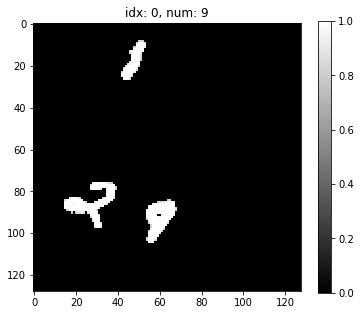

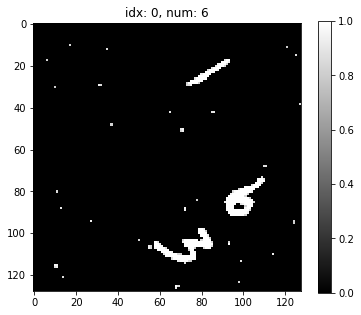

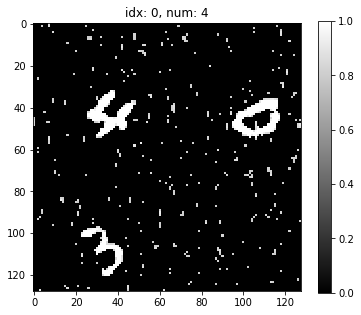

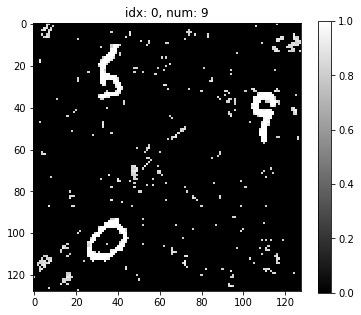

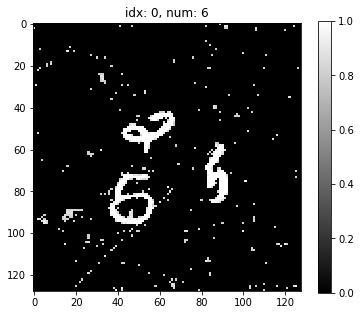

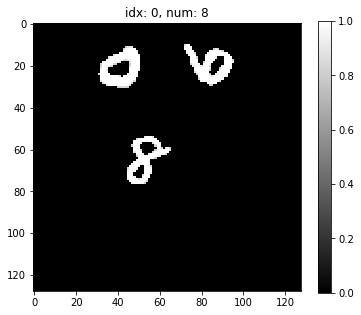

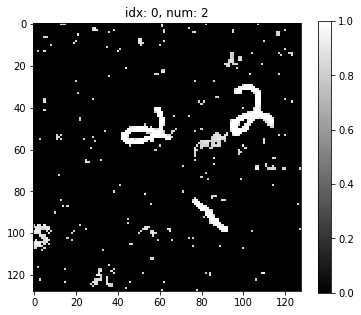

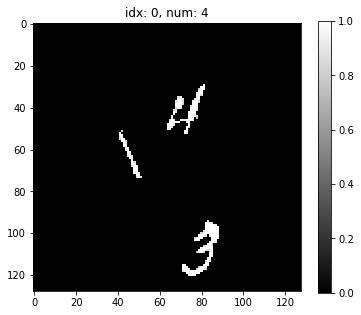

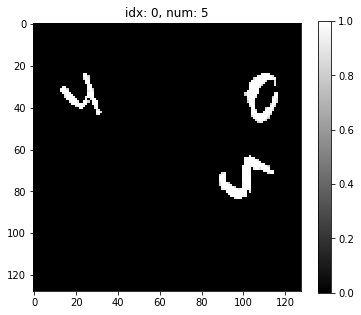

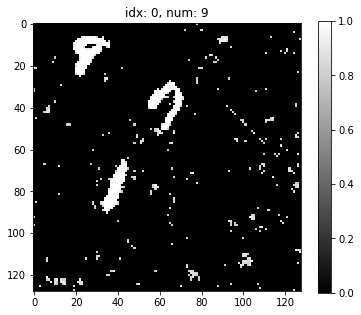

In [0]:
for img, (idx, val) in zip(test, enumerate(predictions)):
  if idx is 10:
    break
  show_image(img, 0, np.argmax(val))

In [0]:
import csv
try:
    with open('/content/submission.csv', mode='w') as sub:
        writer = csv.writer(sub, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        writer.writerow(['Id','Label'])
        
        for idx, val in enumerate(predictions):
            writer.writerow([idx,np.argmax(val)])
except Exception as e:
    print(e)

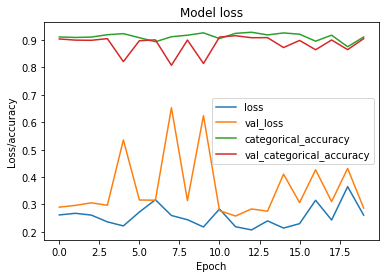

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.title('Model loss')
plt.ylabel('Loss/accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])